In [1]:
import sys, os 
from dotenv import load_dotenv
load_dotenv("../.env")
sys.path.append(os.environ.get("SRC_FOLDER"))


In [2]:

import pandas as pd 
import numpy as np 
import scipy.stats as stats
import causalinf.th #.synthetic
import causalinf.ab.synthetic_control
import matplotlib.pyplot as plt 



random_factor = 9374

# build a 
period_steps = 7
periodicity_factor = np.sin( np.pi*np.arange(0,period_steps)/(period_steps-1) )**2
periodicity_factor = periodicity_factor - periodicity_factor.mean()


uplift = 0.2
test_avg = {} 
test_avg["pre"] = 120
test_avg["post"] = (1+uplift)*test_avg["pre"]

test_seasonal_component = .1
test_std = 5

ctrls_avg = { "a": 70, "b": 180, "c": 100 }
ctrls_std = { "a": 3, "b": 7, "c": 10 }
ctrls_seasonal_component = { "a": .1, "b": .2, "c": 0.0 }

steps = {
    "pre": 20*period_steps, "post": 8*period_steps
}


## Build time series
test_th = {}
for period_name in steps.keys():
    test_th[period_name] = causalinf.th.synthetic.normally_distributed_time_series(
        (1 + test_seasonal_component*periodicity_factor) * test_avg[period_name], 
        test_std, 
        steps[period_name], random_factor
        )
test_th["full"] = np.hstack((test_th["pre"], test_th["post"]))


ctrls_th = {}
for ctrl_name in ctrls_avg.keys():
    ctrls_th[ctrl_name] = {}
    for period_name in steps.keys():
        random_factor += 1

        ctrls_th[ctrl_name][period_name] = causalinf.th.synthetic.normally_distributed_time_series(
            (1 + ctrls_seasonal_component[ctrl_name]*periodicity_factor)*ctrls_avg[ctrl_name], 
            ctrls_std[ctrl_name], steps[period_name], random_factor
        )
    ctrls_th[ctrl_name]["full"] = np.hstack(
        (ctrls_th[ctrl_name]["pre"], ctrls_th[ctrl_name]["post"])
    )
    # compute correlation (on pre period only)
    ctrls_th[ctrl_name]["pearson"] = causalinf.th.correlation.pearson(
        test_th["pre"], ctrls_th[ctrl_name]["pre"]
    )[0][0]



# View time histories
fig = plt.figure(figsize=(8.,3.))
Ax = fig.subplots(1,1,squeeze=False)
Ax[0,0].plot( test_th["full"], label="test", lw=2, color="r", alpha=0.6)
for ii, ctrl_name in enumerate(ctrls_th.keys()):
    Ax[0,0].plot( 
        ctrls_th[ctrl_name]["full"], 
        label=f"""{ctrl_name} ({ctrls_th[ctrl_name]["pearson"]:.3f})""", lw=1, alpha=0.6)

Ax[0,0].axvline(steps["pre"], label="intervention", color="k")
Ax[0,0].legend()
# plt.show()
plt.close("all")



# View distributions
# x = np.linspace(0, 1.5*max( test_avg["pre"], max(list(ctrls_avg.values()))), 1000)
x = np.linspace(
     min(list(test_avg.values())) - 3*test_std, 
     max(list(test_avg.values())) + 3*test_std, 
     1000)
fig = plt.figure(figsize=(16.,3.))
Ax = fig.subplots(1,3,squeeze=False)

ax = Ax[0,0]
ax.set_title("Test Population Distributions")
for period_name in steps.keys():
    ax.plot(x, stats.norm.pdf(x, test_avg[period_name], test_std), label=f"test pop. ({period_name})" )
ax.legend()


for ii,ss in enumerate([4*period_steps, 8*period_steps]):
    ax = Ax[0,1+ii]
    ax.set_title(f"Test {ss} Sample Mean Distr.")
    plt.gca().set_prop_cycle(None)
    for period_name in steps.keys():
        ax.plot(x, stats.norm.pdf(x, test_avg[period_name], test_std), label=f"test pop. ({period_name})" )
    plt.gca().set_prop_cycle(None)
    for period_name in steps.keys():    
        ax.hist(test_th[period_name][:ss], bins=20, density=True, alpha=.4, label=f"sample mean ({period_name})" )
    ax.legend()

# plt.show()
plt.close("all")


ModuleNotFoundError: No module named 'causalinf'

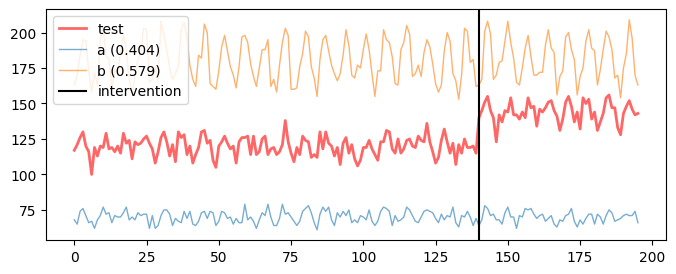

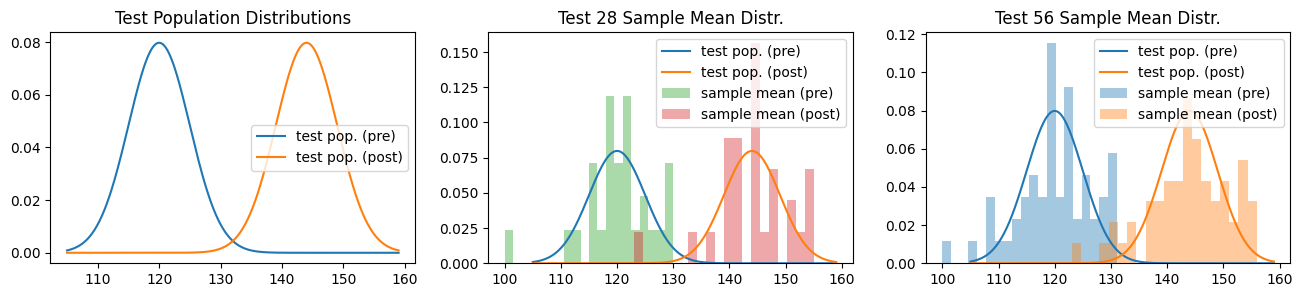

In [ ]:


import numpy as np 
import scipy.stats as stats
import causalinf.th #.synthetic
import matplotlib.pyplot as plt 

random_factor = 9374

# build a 
period_steps = 7
periodicity_factor = np.sin( np.pi*np.arange(0,period_steps)/(period_steps-1) )**2
periodicity_factor = periodicity_factor - periodicity_factor.mean()


uplift = 0.2
test_avg = {} 
test_avg["pre"] = 120
test_avg["post"] = (1+uplift)*test_avg["pre"]

test_seasonal_component = .1
test_std = 5

ctrls_avg = { "a": 70, "b": 180 }
ctrls_std = { "a": 3, "b": 7 }
ctrls_seasonal_component = { "a": .1, "b": .2 }

steps = {
    "pre": 20*period_steps, "post": 8*period_steps
}


## Build time series
test_th = {}
for period_name in steps.keys():
    test_th[period_name] = causalinf.th.synthetic.normally_distributed_time_series(
        (1 + test_seasonal_component*periodicity_factor) * test_avg[period_name], 
        test_std, 
        steps[period_name], random_factor
        )
test_th["full"] = np.hstack((test_th["pre"], test_th["post"]))


ctrls_th = {}
for ctrl_name in ctrls_avg.keys():
    ctrls_th[ctrl_name] = {}
    for period_name in steps.keys():
        random_factor += 1

        ctrls_th[ctrl_name][period_name] = causalinf.th.synthetic.normally_distributed_time_series(
            (1 + ctrls_seasonal_component[ctrl_name]*periodicity_factor)*ctrls_avg[ctrl_name], 
            ctrls_std[ctrl_name], steps[period_name], random_factor
        )
    ctrls_th[ctrl_name]["full"] = np.hstack(
        (ctrls_th[ctrl_name]["pre"], ctrls_th[ctrl_name]["post"])
    )
    # compute correlation (on pre period only)
    ctrls_th[ctrl_name]["pearson"] = causalinf.th.correlation.pearson(
        test_th["pre"], ctrls_th[ctrl_name]["pre"]
    )[0][0]


# View time histories
fig = plt.figure(figsize=(8.,3.))
Ax = fig.subplots(1,1,squeeze=False)
Ax[0,0].plot( test_th["full"], label="test", lw=2, color="r", alpha=0.6)
for ii, ctrl_name in enumerate(ctrls_th.keys()):
    Ax[0,0].plot( 
        ctrls_th[ctrl_name]["full"], 
        label=f"""{ctrl_name} ({ctrls_th[ctrl_name]["pearson"]:.3f})""", lw=1, alpha=0.6)

Ax[0,0].axvline(steps["pre"], label="intervention", color="k")
Ax[0,0].legend()


# View distributions
# x = np.linspace(0, 1.5*max( test_avg["pre"], max(list(ctrls_avg.values()))), 1000)
x = np.linspace(
     min(list(test_avg.values())) - 3*test_std, 
     max(list(test_avg.values())) + 3*test_std, 
     1000)
fig = plt.figure(figsize=(16.,3.))
Ax = fig.subplots(1,3,squeeze=False)

ax = Ax[0,0]
ax.set_title("Test Population Distributions")
for period_name in steps.keys():
    ax.plot(x, stats.norm.pdf(x, test_avg[period_name], test_std), label=f"test pop. ({period_name})" )
ax.legend()


for ii,ss in enumerate([4*period_steps, 8*period_steps]):
    ax = Ax[0,1+ii]
    ax.set_title(f"Test {ss} Sample Mean Distr.")
    plt.gca().set_prop_cycle(None)
    for period_name in steps.keys():
        ax.plot(x, stats.norm.pdf(x, test_avg[period_name], test_std), label=f"test pop. ({period_name})" )
    plt.gca().set_prop_cycle(None)
    for period_name in steps.keys():    
        ax.hist(test_th[period_name][:ss], bins=20, density=True, alpha=.4, label=f"sample mean ({period_name})" )

    ax.legend()

